<a href="https://colab.research.google.com/github/Kait3K/Haldane-model-numerical-calculation/blob/main/Haldane_Phase_Diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

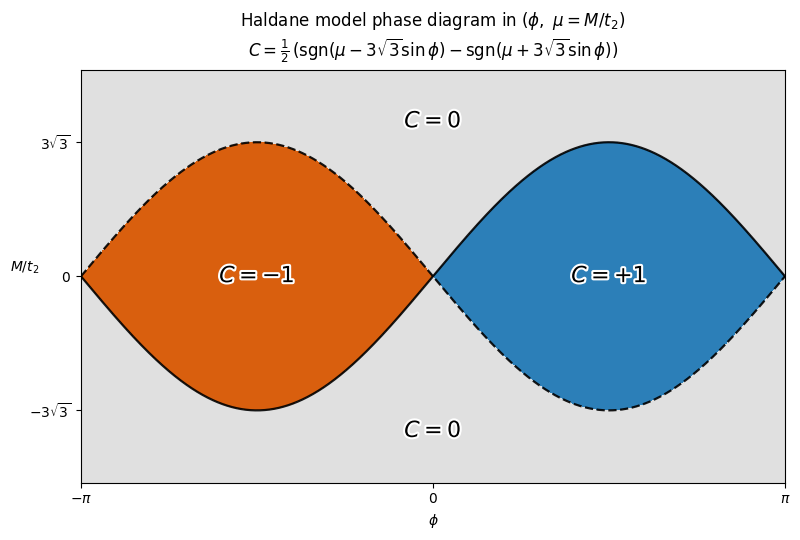

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patheffects as pe

n_phi, n_mu = 1200, 801
phi_min, phi_max = -np.pi, np.pi
mu_min, mu_max = -8.0, 8.0

phi = np.linspace(phi_min, phi_max, n_phi)
mu = np.linspace(mu_min, mu_max, n_mu)
PHI, MU = np.meshgrid(phi, mu, indexing="xy")

A = 3.0 * np.sqrt(3.0)
s1 = np.sign(MU - A * np.sin(PHI))
s2 = np.sign(MU + A * np.sin(PHI))
C = 0.5 * (s1 - s2)

fig, ax = plt.subplots(figsize=(8, 5.5))
cmap = ListedColormap(["#2c7fb8", "#e0e0e0", "#d95f0e"])
bounds = [-1.5, -0.5, 0.5, 1.5]
norm = BoundaryNorm(bounds, cmap.N)
pcm = ax.pcolormesh(PHI, MU, C, cmap=cmap, norm=norm, shading="auto")

mu_b = A * np.sin(phi)
ax.plot(phi, mu_b, lw=1.6, linestyle='-', color='k', alpha=0.9)
ax.plot(phi, -mu_b, lw=1.6, linestyle='--', color='k', alpha=0.9)

ax.set_xlim(phi_min, phi_max)
ax.set_ylim(mu_min, mu_max)
ax.set_xlabel(r"$\phi$")
ax.set_ylabel(r"$M/t_2$", rotation=0, labelpad=18)
ax.yaxis.set_label_coords(-0.08, 0.5)

ax.set_xticks([-np.pi, 0.0, np.pi])
ax.set_xticklabels([r"$-\pi$", r"$0$", r"$\pi$"])

yt = A * np.array([-1.0, 0.0, 1.0])
ax.set_yticks(yt)
ax.set_yticklabels([r"$-3\sqrt{3}$", r"$0$", r"$3\sqrt{3}$"])

ax.set_title(
    r"Haldane model phase diagram in $(\phi,\ \mu=M/t_2)$" + "\n"
    r"$C=\frac{1}{2}\,(\mathrm{sgn}(\mu-3\sqrt{3}\sin\phi)-\mathrm{sgn}(\mu+3\sqrt{3}\sin\phi))$",
    pad=10
)

stroke = [pe.withStroke(linewidth=3, foreground="white")]
ax.text(-np.pi/2, 0.0, r"$C=-1$", ha="center", va="center", fontsize=16, color="black", path_effects=stroke)
ax.text(+np.pi/2, 0.0, r"$C=+1$", ha="center", va="center", fontsize=16, color="black", path_effects=stroke)
ax.text(0.0, 0.75*mu_max, r"$C=0$", ha="center", va="center", fontsize=16, color="black", path_effects=stroke)
ax.text(0.0, -0.75*mu_max, r"$C=0$", ha="center", va="center", fontsize=16, color="black", path_effects=stroke)

fig.subplots_adjust(left=0.18)
plt.tight_layout()
plt.show()
